In [44]:
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import day_abbr, month_abbr, mdays
import datetime
#from datetime import datetime

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

from dateutil.easter import easter
import os

#from holidays import WEEKEND, HolidayBase
#from dateutil.easter import easter
#from dateutil.relativedelta import relativedelta as rd


#Author: Vatsala

In [45]:
plot_file_path="../plotImages/"

In [46]:
#****** Running Visualisation for Plot 1 *******  Note: Data has been QC-ed

#read Plot 1 data
data = read_excel('../plotData/plotData_1.xlsx', sheet_name='Sheet1', index_col=13, parse_dates=[13])    

In [47]:
print(data.head(10))
data.dtypes

                     QC  Plot_ID  DailyRep treatment       Date   pv      ghg  \
DateTime                                                                        
2019-03-26 17:26:00   0        1         4        F0 2019-03-26  ***  N2O_dry   
2019-03-26 21:49:00   0        1         5        F0 2019-03-26  ***  N2O_dry   
2019-03-27 06:28:00   0        1         1        F0 2019-03-27  ***  N2O_dry   
2019-03-28 20:34:00   0        1         2        F0 2019-03-28    *  N2O_dry   
2019-03-30 02:43:00   0        1         0        F0 2019-03-30  ***  N2O_dry   
2019-03-30 15:27:00   0        1         2        F0 2019-03-30  ***  N2O_dry   
2019-03-30 19:51:00   0        1         3        F0 2019-03-30   **  N2O_dry   
2019-03-31 00:17:00   0        1         0        F0 2019-03-31  ***  N2O_dry   
2019-03-31 04:43:00   0        1         1        F0 2019-03-31  ***  N2O_dry   
2019-03-31 13:32:00   0        1         3        F0 2019-03-31  ***  N2O_dry   

                    unit   

QC                     int64
Plot_ID                int64
DailyRep               int64
treatment             object
Date          datetime64[ns]
pv                    object
ghg                   object
unit                  object
flux                 float64
r2                   float64
nrmse                float64
podpu                float64
epoch_time            object
dtype: object

In [48]:
#This dataframe will be used for running in the Prophet model
#Extract only datetime and flux from the series
dataframe = DataFrame()
#dataframe['DateTime'] = data['DateTime']
dataframe['Flux']     = data['flux']
dataframe['ghg']      = data['ghg']
print(dataframe.tail(10))

                          Flux      ghg
DateTime                               
2019-06-27 22:38:00   768.2786  CO2_dry
2019-06-28 02:56:00   550.3863  CO2_dry
2019-06-28 15:51:00   351.4631  CO2_dry
2019-06-28 20:09:00   867.6166  CO2_dry
2019-06-29 00:27:00  1160.3080  CO2_dry
2019-06-29 04:46:00   930.5471  CO2_dry
2019-06-29 13:22:00   412.6364  CO2_dry
2019-06-29 17:41:00   540.0715  CO2_dry
2019-06-29 21:59:00   953.3316  CO2_dry
2019-06-30 02:17:00   684.4827  CO2_dry


In [49]:
#Resampling the data on weekly frequency
# Resampling the time series data based on weekly frequency - 'W'

weekly_resampled_data = dataframe['Flux'].resample('W').mean() 

In [50]:
weekly_resampled_data

DateTime
2019-03-31     -6.284731
2019-04-07     -1.047649
2019-04-14    -17.841520
2019-04-21    -37.011888
2019-04-28     59.018756
2019-05-05     -5.162470
2019-05-12    -21.767803
2019-05-19     58.954428
2019-05-26    129.190353
2019-06-02     91.318808
2019-06-09    111.199292
2019-06-16    142.815505
2019-06-23    -38.814027
2019-06-30    305.594929
Freq: W-SUN, Name: Flux, dtype: float64

In [51]:
#Downsampling - every 3 hours observations per day
resample = dataframe.resample('W')
weekly_mean_flux = resample.mean()

weekly_mean_flux['Week'] = weekly_mean_flux.index
weekly_mean_flux

,Flux,Week
DateTime,,
2019-03-31,-6.284731,2019-03-31
2019-04-07,-1.047649,2019-04-07
2019-04-14,-17.841520,2019-04-14
2019-04-21,-37.011888,2019-04-21
2019-04-28,59.018756,2019-04-28
2019-05-05,-5.162470,2019-05-05
2019-05-12,-21.767803,2019-05-12
2019-05-19,58.954428,2019-05-19
2019-05-26,129.190353,2019-05-26


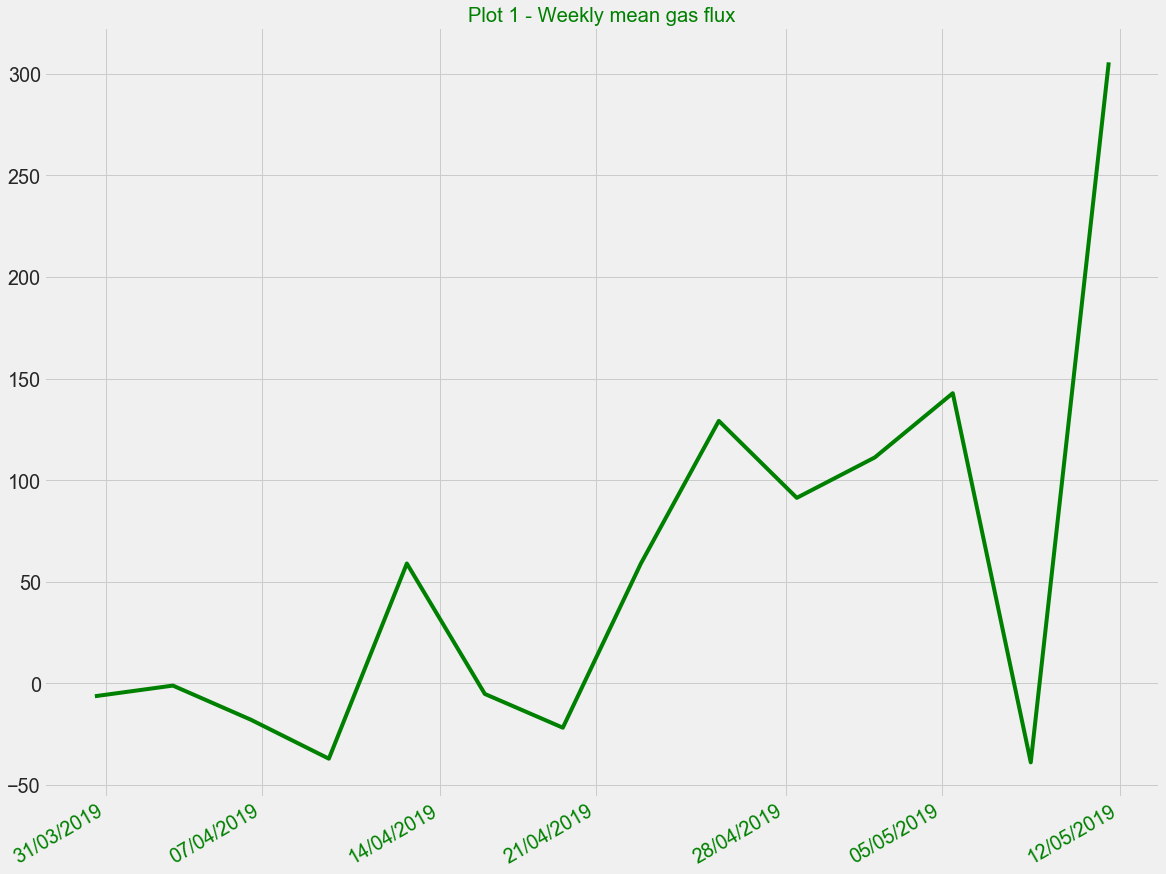

In [52]:
#Plot the weekly frequency

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, ax = plt.subplots(1)
#fig.suptitle('Plot 1 - Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=10.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

ax.plot(weekly_mean_flux['Week'], weekly_mean_flux['Flux'], color = 'green')  #, edgecolor = 'darkblue'
ax.set_title('Plot 1 - Weekly mean gas flux', color = 'green')
ax.set_xticklabels(weekly_mean_flux['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')


#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_lineplot_weeklyFreq_meanallgases.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

### Explore Plot data - mean flux per hour for each day of week

In [53]:
#Get hour per day and weekday (by name)
hour_week1 = dataframe.copy()
hour_week1.loc[:,'day_of_week'] = hour_week1.index.weekday
hour_week1.loc[:,'hour_in_day'] = hour_week1.index.hour

hour_week1.drop('ghg', axis=1, inplace=True)
hour_week1

,Flux,day_of_week,hour_in_day
DateTime,,,
2019-03-26 17:26:00,-144.0262,1,17
2019-03-26 21:49:00,-102.3469,1,21
2019-03-27 06:28:00,-93.0909,2,6
2019-03-28 20:34:00,63.8219,3,20
2019-03-30 02:43:00,-157.9453,5,2
...,...,...,...
2019-06-29 04:46:00,930.5471,5,4
2019-06-29 13:22:00,412.6364,5,13
2019-06-29 17:41:00,540.0715,5,17


#### Group the columns day of week and hour in day and calculate the mean flux

In [54]:
hour_week1 = hour_week1.groupby(['day_of_week','hour_in_day']).mean().round(decimals=3).unstack()
hour_week1

Flux                                                       \
hour_in_day       0        1        2        3        4        5       6    
day_of_week                                                                 
0            200.623  134.825  162.460      NaN  161.355  139.632     NaN   
1                NaN  172.994  289.304  157.162      NaN -120.280   1.311   
2            242.946      NaN      NaN  188.995  274.335   47.497  36.844   
3            211.025  275.147  289.230      NaN  124.025  218.745     NaN   
4            149.599  154.109  188.302  158.331  196.137      NaN     NaN   
5            143.212  212.579  288.184      NaN  449.947  103.038     NaN   
6            148.456      NaN  159.619  201.138  329.197      NaN -96.669   

                                        ...                             \
hour_in_day       7        8        9   ...       14       15       16   
day_of_week                             ...                              
0                NaN -124.712 -649.826  ... -443.879      NaN      NaN   
1            -28.709      NaN      NaN  ... -117.233 -196.440      NaN   
2           -399.633      NaN -258.244  ...      NaN      NaN  -93.810   
3                NaN  -26.985 -284.088  ... -196.095  -91.595      NaN   
4            -41.315 -178.280      NaN  ...      NaN  -25.386 -182.937   
5                NaN -265.749 -140.797  ... -257.299 -493.596      NaN   
6           -201.527      NaN      NaN  ...      NaN -298.291  -91.583   

                                                                            
hour_in_day       17       18       19       20       21       22       23  
day_of_week                                                                 
0             10.480  114.938  127.599      NaN  227.772  255.633  189.981  
1           -236.293  361.751      NaN  220.737   13.614      NaN  245.974  
2                NaN  117.954  352.796  213.165  223.966  192.840   70.329  
3                NaN   86.259  153.912  -33.050      NaN  203.079  194.632  
4            198.675      NaN  208.127  136.668  220.477      NaN      NaN  
5            109.105  258.919  140.332  231.228  215.155  106.528  347.124  
6            167.221      NaN  183.083  264.194      NaN   77.140   78.538  

[7 rows x 24 columns]

In [55]:
hour_week1.columns = hour_week1.columns.droplevel(0)
hour_week1

hour_in_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,200.623,134.825,162.460,NaN,161.355,139.632,NaN,NaN,-124.712,-649.826,...,-443.879,NaN,NaN,10.480,114.938,127.599,NaN,227.772,255.633,189.981
1,NaN,172.994,289.304,157.162,NaN,-120.280,1.311,-28.709,NaN,NaN,...,-117.233,-196.440,NaN,-236.293,361.751,NaN,220.737,13.614,NaN,245.974
2,242.946,NaN,NaN,188.995,274.335,47.497,36.844,-399.633,NaN,-258.244,...,NaN,NaN,-93.810,NaN,117.954,352.796,213.165,223.966,192.840,70.329
3,211.025,275.147,289.230,NaN,124.025,218.745,NaN,NaN,-26.985,-284.088,...,-196.095,-91.595,NaN,NaN,86.259,153.912,-33.050,NaN,203.079,194.632
4,149.599,154.109,188.302,158.331,196.137,NaN,NaN,-41.315,-178.280,NaN,...,NaN,-25.386,-182.937,198.675,NaN,208.127,136.668,220.477,NaN,NaN
5,143.212,212.579,288.184,NaN,449.947,103.038,NaN,NaN,-265.749,-140.797,...,-257.299,-493.596,NaN,109.105,258.919,140.332,231.228,215.155,106.528,347.124
6,148.456,NaN,159.619,201.138,329.197,NaN,-96.669,-201.527,NaN,NaN,...,NaN,-298.291,-91.583,167.221,NaN,183.083,264.194,NaN,77.140,78.538


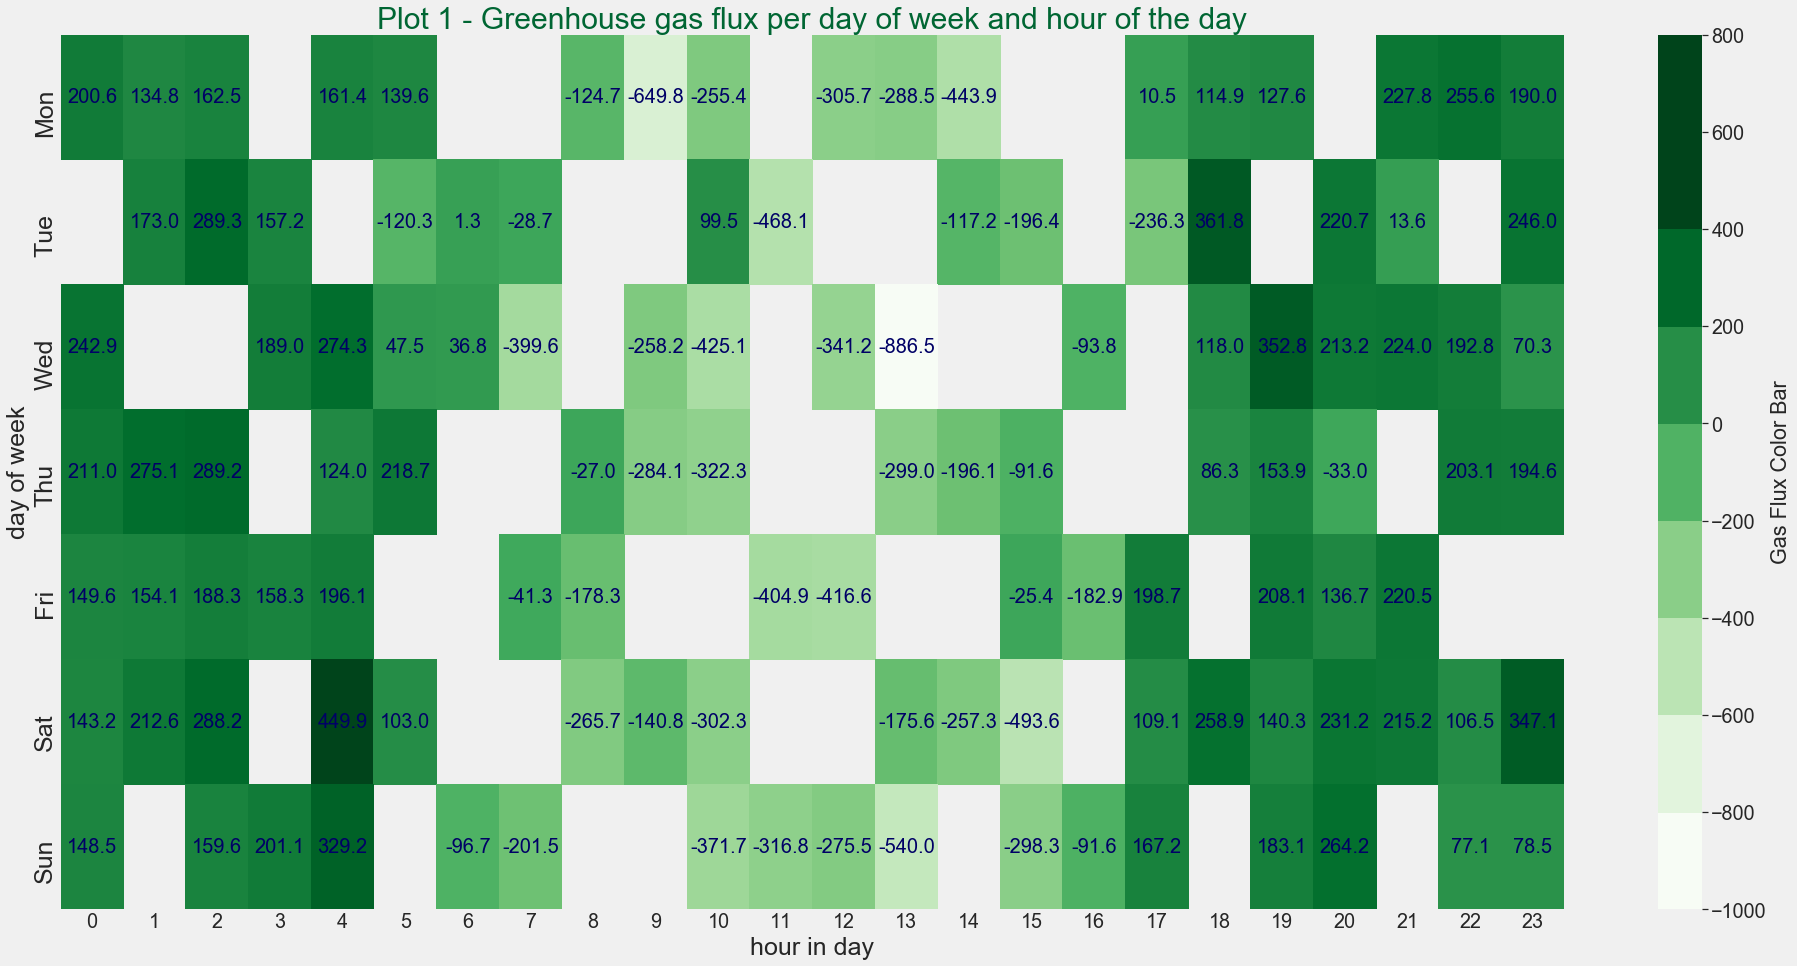

In [62]:
#Plot heat map for the dataframe hour_week : {DataTime, Flux, day of week, hour in day}

f1, ax1 = plt.subplots(figsize=(30, 15))

sns.set(font_scale=1.8)

heat_map = sns.heatmap(hour_week1, ax=ax1, cmap="Greens", annot=True, annot_kws={"size": 20, "color":'#000066'},
                       cbar_kws={'label': 'Gas Flux Color Bar', 'boundaries':np.arange(-1000,1000,200)},
                       fmt='.1f')

ax1.set_title('Plot 1 - Greenhouse gas flux per day of week and hour of the day', fontsize=30, color='#006633')
ax1.set_xlabel('hour in day', fontsize=25)
ax1.set_ylabel('day of week', fontsize=25)

ax1.set_yticklabels(day_abbr[0:7], fontsize=25)

#Save heatmap as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_heatmap_mean_hourinday_dayofweek.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [56]:
#Divide the dataframe in the 3 gases measured

#1. Use Boolean Indexing to divide the dataframe as per the gases found
#N2O_dry, CH4_dry, CO2_dry
dataframe_N2Odry = dataframe[dataframe['ghg'] == "N2O_dry"]

dataframe_CH4dry = dataframe[dataframe['ghg'] == "CH4_dry"]

dataframe_CO2dry = dataframe[dataframe['ghg'] == "CO2_dry"]
#dataframe_CH4dry


In [57]:
#Resample weekly frequency for each of the gases 

#N2O dry
resample_N2Odry             = dataframe_N2Odry.resample('W')
weekly_mean_flux_N2O        = resample_N2Odry.mean()
weekly_mean_flux_N2O['Week']= weekly_mean_flux_N2O.index

#CH4 dry
resample_CH4dry             = dataframe_CH4dry.resample('W')
weekly_mean_flux_CH4        = resample_CH4dry.mean()
weekly_mean_flux_CH4['Week']= weekly_mean_flux_CH4.index

#CO2 dry
resample_CO2dry             = dataframe_CO2dry.resample('W')
weekly_mean_flux_CO2        = resample_CO2dry.mean()
weekly_mean_flux_CO2['Week']= weekly_mean_flux_CO2.index

#weekly_mean_flux_N2O
#weekly_mean_flux_CH4
#weekly_mean_flux_CO2

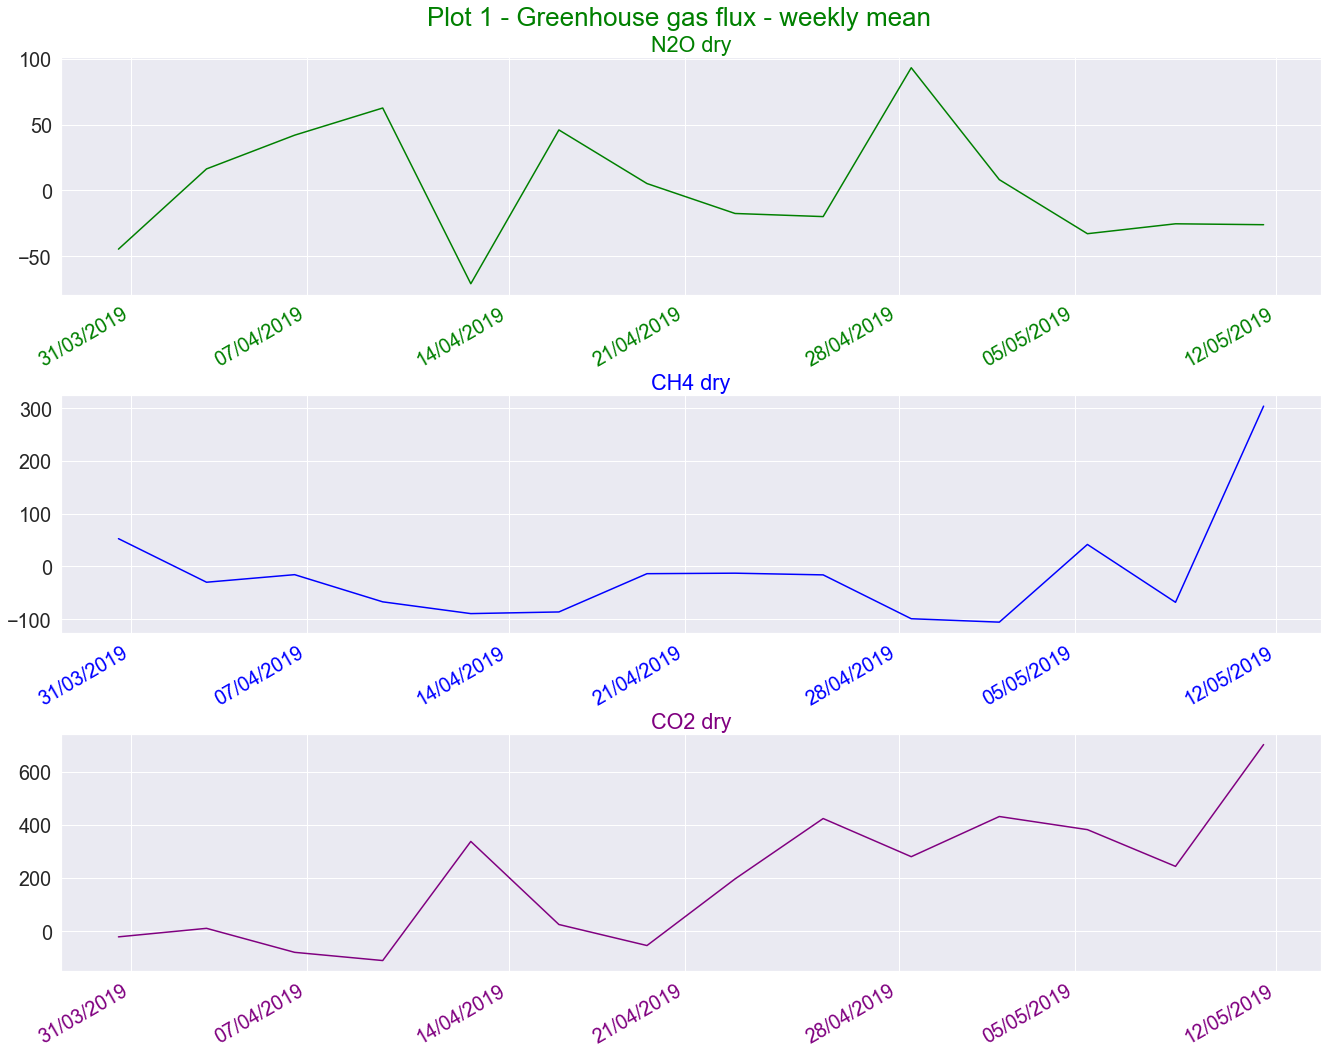

In [65]:
#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig1, axs1 = plt.subplots(3)
fig1.suptitle('Plot 1 - Greenhouse gas flux - weekly mean', color = 'green')
fig1.tight_layout(pad=3.0)

axs1[0].plot(weekly_mean_flux_N2O.index, weekly_mean_flux_N2O['Flux'], color = 'green')  #, edgecolor = 'darkblue'
axs1[0].set_title('N2O dry', color = 'green')
axs1[0].set_xticklabels(weekly_mean_flux_N2O['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs1[1].plot(weekly_mean_flux_CH4.index, weekly_mean_flux_CH4['Flux'],  color = 'blue')
axs1[1].set_title('CH4 dry', color = 'blue')
axs1[1].set_xticklabels(weekly_mean_flux_CH4['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs1[2].plot(weekly_mean_flux_CO2.index, weekly_mean_flux_CO2['Flux'],  color = 'purple')
axs1[2].set_title('CO2 dry', color = 'purple')
axs1[2].set_xticklabels(weekly_mean_flux_CO2['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_lineplot_weeklyFreq_meanseparategases.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [39]:
#weekly_mean_flux_N2O

In [40]:
#Find the maximum, minimum and mean gas flux per for N2O - weekly

resample_N2Odry_3features              = dataframe_N2Odry.resample('W')
weekly_mean_flux_N2O_3features         = resample_N2Odry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_N2O_3features['Week'] = weekly_mean_flux_N2O_3features.index
# OR we can do this --> weekly_mean_flux_N2O1        = resample_N2Odry1.min()
weekly_mean_flux_N2O_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

#weekly_mean_flux_N2O_3features

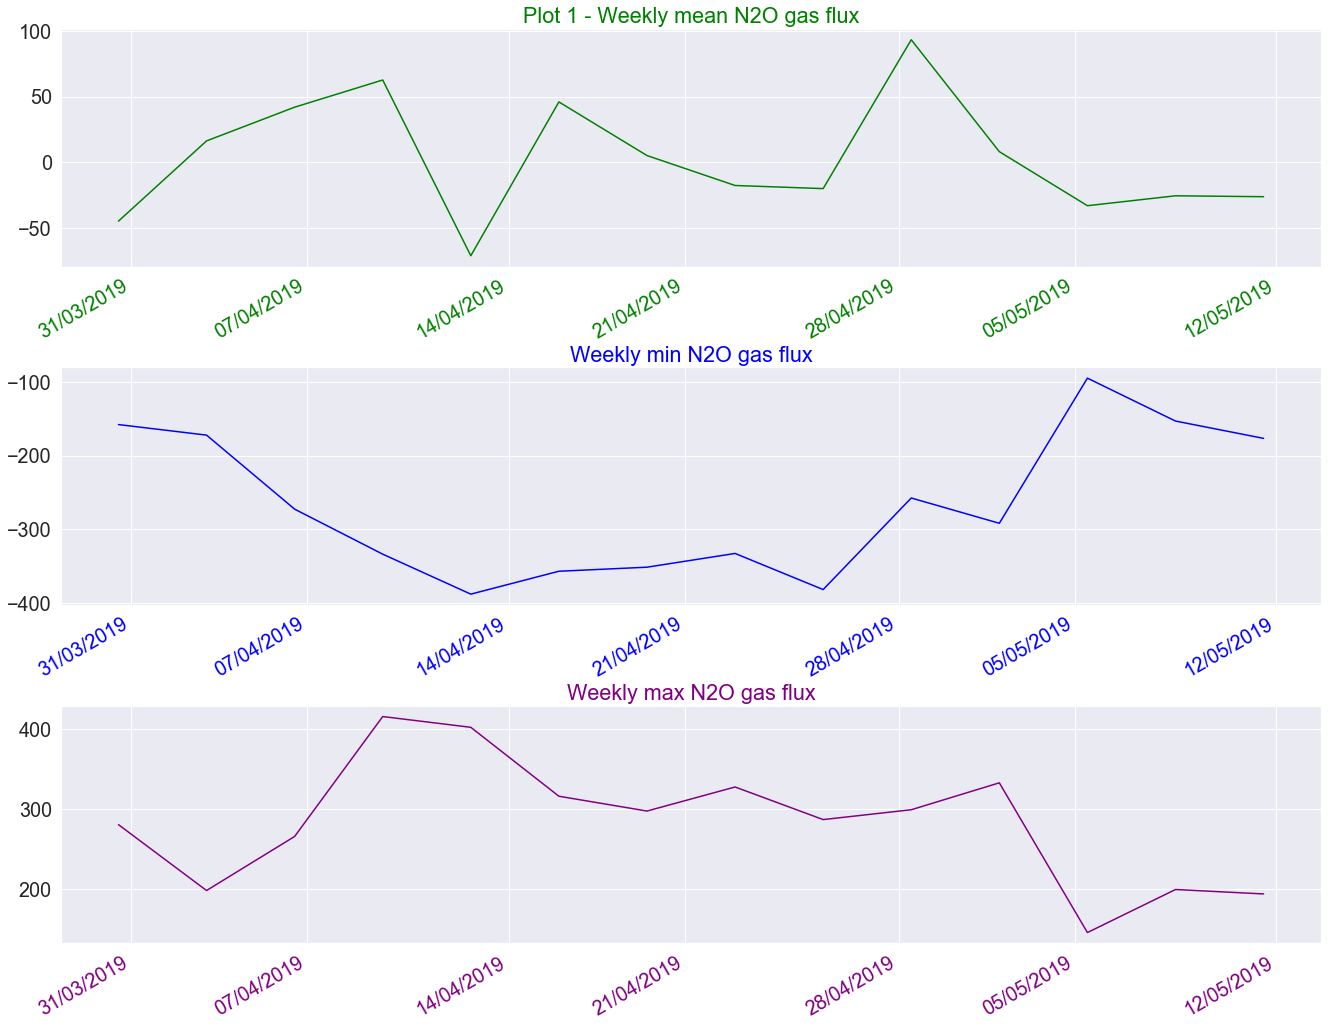

In [66]:
#Plot the weekly frequency for NO2 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=3.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot 1 - Weekly mean N2O gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min N2O gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max N2O gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_lineplot_weeklyFreq_meanminmaxN2O.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [42]:
#Find the maximum, minimum and mean gas flux per for CH4 - weekly

resample_CH4dry_3features              = dataframe_CH4dry.resample('W')
weekly_mean_flux_CH4_3features         = resample_CH4dry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_CH4_3features['Week'] = weekly_mean_flux_CH4_3features.index

weekly_mean_flux_CH4_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

#weekly_mean_flux_CH4_3features

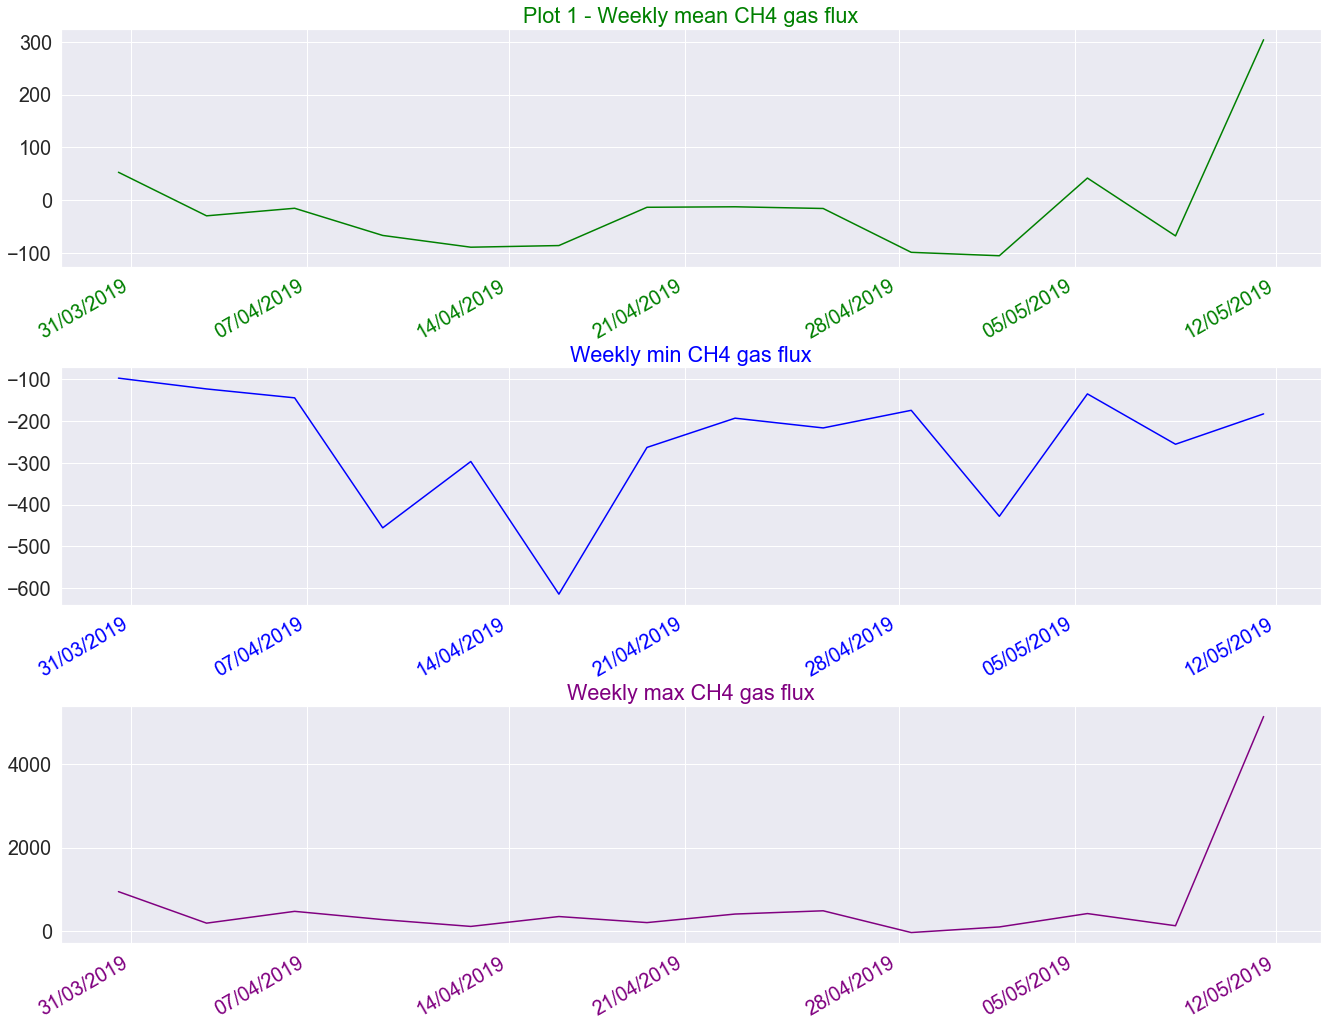

In [67]:
#Plot the weekly frequency for CH4 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=3.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot 1 - Weekly mean CH4 gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min CH4 gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max CH4 gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_lineplot_weeklyFreq_meanminmaxCH4.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [22]:
#Find the maximum, minimum and mean gas flux per for CO2 - weekly

resample_CO2dry_3features              = dataframe_CO2dry.resample('W')
weekly_mean_flux_CO2_3features         = resample_CO2dry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_CO2_3features['Week'] = weekly_mean_flux_CO2_3features.index

weekly_mean_flux_CO2_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

#weekly_mean_flux_CO2_3features

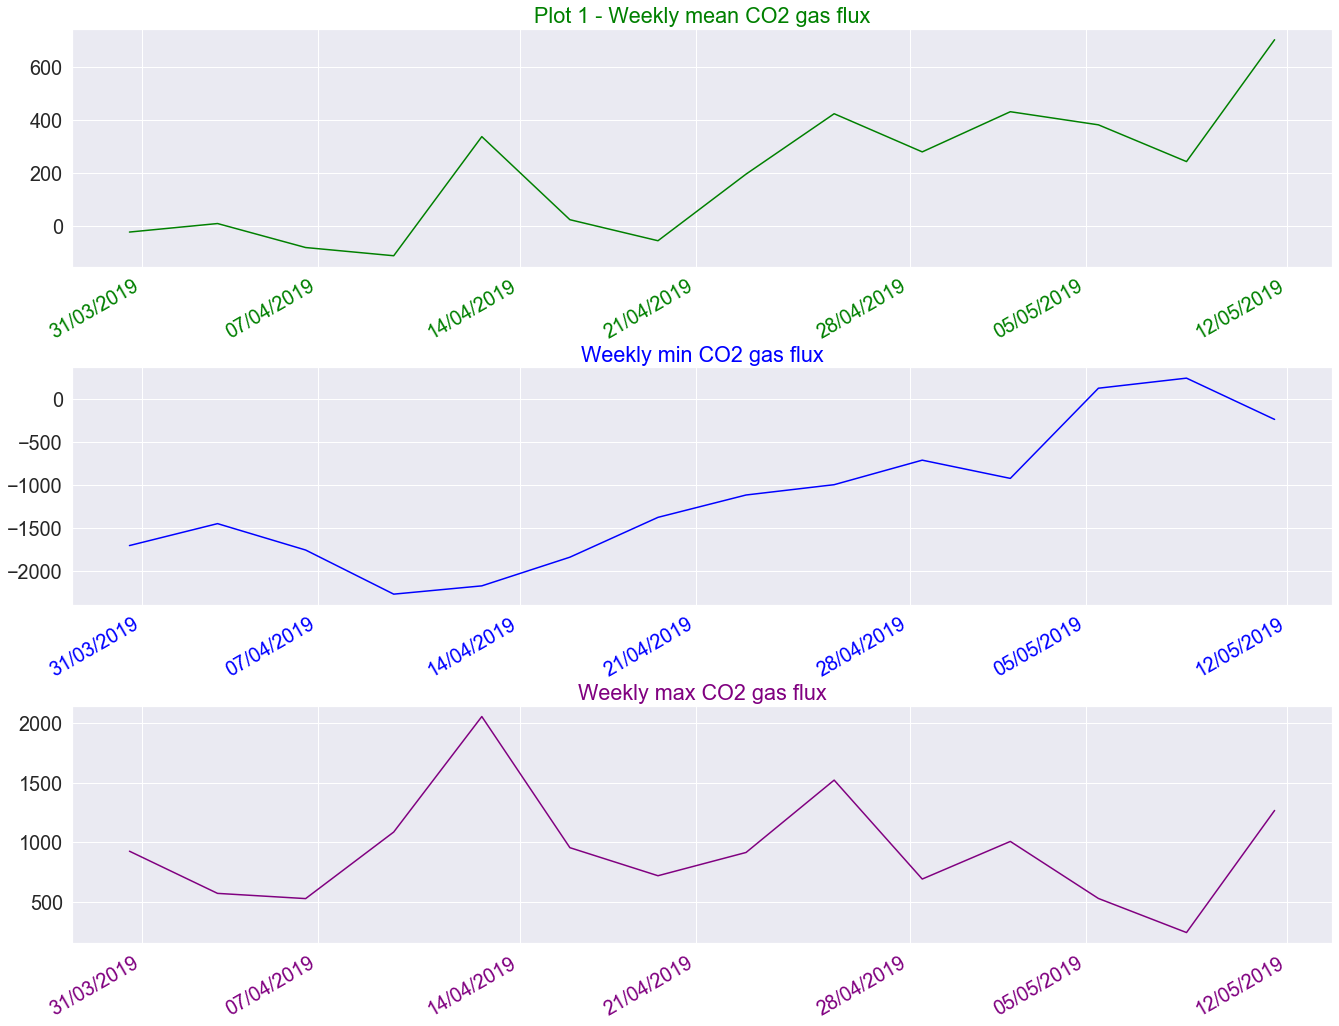

In [68]:
#Plot the weekly frequency for CO2 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=3.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot 1 - Weekly mean CO2 gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min CO2 gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max CO2 gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot1_lineplot_weeklyFreq_meanminmaxCO2.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [24]:
#Plot mean for each separate gas together in one frame
#should be the same as cell 143

### Explore Plot data - mean flux per hour for each day of week

In [25]:
hour_week2 = dataframe.copy()
hour_week2.loc[:,'day_of_week'] = hour_week2.index.weekday_name
hour_week2.loc[:,'hour_per_day']= hour_week2.index.hour
print(hour_week2.head(5))
hour_week2.to_csv('arcgha.csv')

                         Flux      ghg day_of_week  hour_per_day
DateTime                                                        
2019-03-26 17:26:00 -144.0262  N2O_dry     Tuesday            17
2019-03-26 21:49:00 -102.3469  N2O_dry     Tuesday            21
2019-03-27 06:28:00  -93.0909  N2O_dry   Wednesday             6
2019-03-28 20:34:00   63.8219  N2O_dry    Thursday            20
2019-03-30 02:43:00 -157.9453  N2O_dry    Saturday             2


In [26]:
#Group by day of week and by hour - and calculate the mean flux
grouped_multiple = hour_week2.groupby(['day_of_week', 'hour_per_day']).agg({'Flux': ['mean', 'min', 'max']})
grouped_multiple.columns = ['flux_mean', 'flux_min', 'flux_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple.head(5))

  day_of_week  hour_per_day   flux_mean  flux_min  flux_max
0      Friday             0  149.599267 -175.0602  508.5739
1      Friday             1  154.108571  -94.8999  469.7041
2      Friday             2  188.301500 -178.9383  857.7275
3      Friday             3  158.331186 -153.1700  641.5220
4      Friday             4  196.136922 -233.3588  798.1198


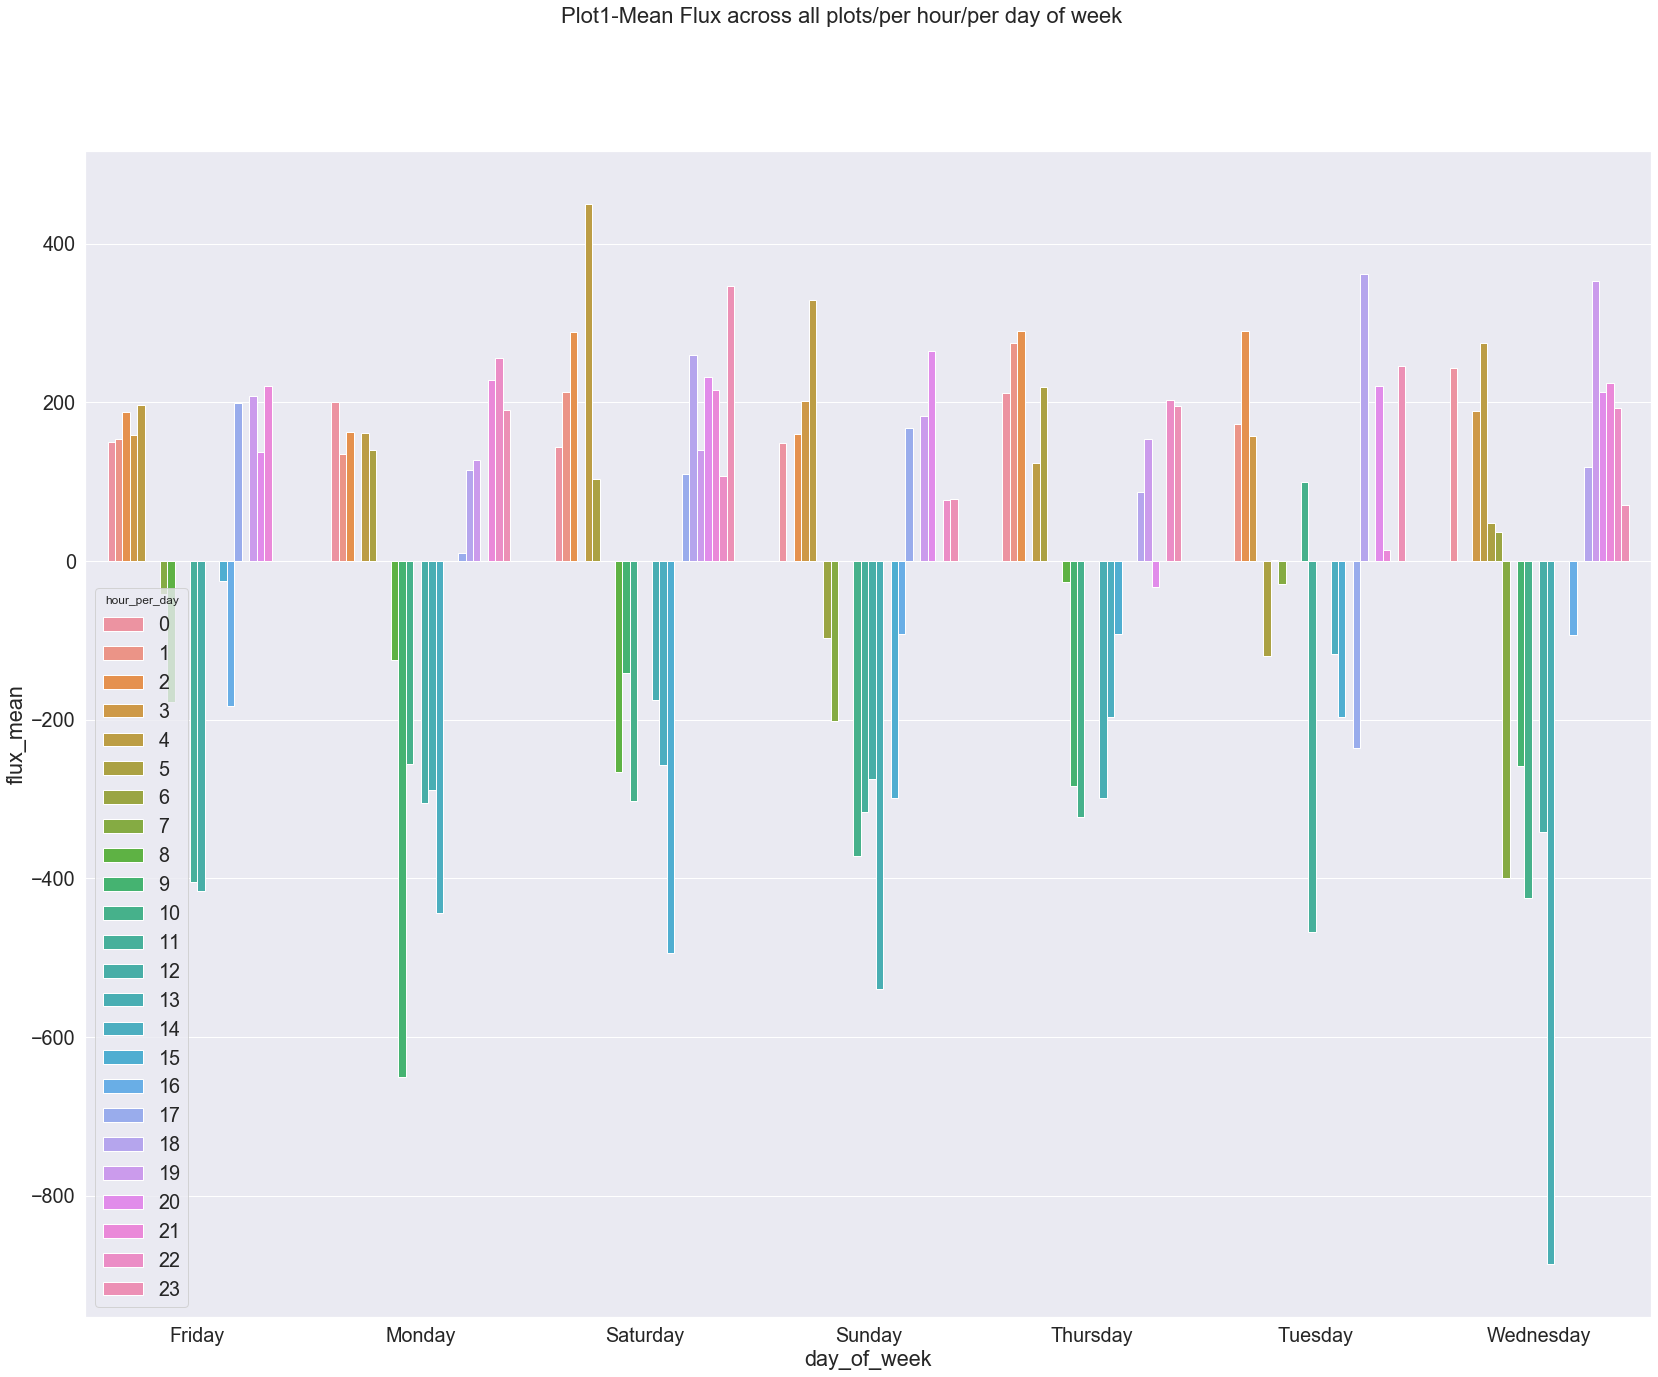

In [27]:
#Plot the flux mean for every hour for each day of week
g = sns.barplot(x='day_of_week', y='flux_mean', hue='hour_per_day', data=grouped_multiple, saturation=0.8)
g.figure.set_figwidth(25)
g.figure.set_figheight(20)
g.figure.suptitle("Plot1-Mean Flux across all plots/per hour/per day of week", fontsize=22)

#Save boxplot as a file
#output file name
output_file_name = "gasflux_Plot1_hourly_dayofweek_barplot.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
g.figure.savefig(plot_file_name)